# Transmission FTIR Spectra

- This Jupyter notebook provides an example workflow for processing transmission FTIR spectra through PyIRoGlass. 

- The Jupyter notebook and data can be accessed here: https://github.com/SarahShi/PyIRoGlass/blob/main/docs/examples/transmission_ftir/. 

- You need to have the PyIRoGlass PyPi package on your machine once. If you have not done this, please uncomment (remove the #) symbol and run the cell below. 

In [8]:
#!pip install PyIRoGlass

# Load Python Packages

In [9]:
# Import packages

import os
import sys
import glob
import numpy as np
import pandas as pd
import mc3

import PyIRoGlass as pig

from IPython.display import Image

import matplotlib
from matplotlib import pyplot as plt
from matplotlib import rc, cm

%matplotlib inline
%config InlineBackend.figure_format = 'retina'

# Set paths to data

In [10]:
# Change paths to direct to folder with transmission FTIR spectra 

TRANS_PATHS = 'SPECTRA/'
TRANS_FILES = sorted(glob.glob(TRANS_PATHS + "*"))
print(TRANS_PATHS)

CHEMTHICK_PATH = 'ChemThick.csv'
print(CHEMTHICK_PATH)

SPECTRA/
ChemThick.csv


# Set desired output file directory name

In [11]:
# Change to be what you want the prefix of your output files to be. 
OUTPUT_PATH = 'RESULTS'
print(OUTPUT_PATH)

RESULTS


# Load transmission FTIR spectra

In [12]:
# Load the path to transmission FTIR spectra

DFS_FILES, DFS_DICT = pig.Load_SampleCSV(TRANS_FILES, wn_high = 5500, wn_low = 1000)

Print the name of all files in the directory 

In [13]:
DFS_FILES

['AC4_OL49_021920_30x30_H2O_a',
 'AC4_OL53_101220_256s_30x30_a',
 'STD_D1010_012821_256s_100x100_a']

Let's look at what a dictionary of transmission FTIR spectra look like. Samples are identified by their file names and the wavenumber and absorbance data are stored for each spectrum. 

In [14]:
DFS_DICT

{'AC4_OL49_021920_30x30_H2O_a':             Absorbance
 Wavenumber            
 1000.917      6.000000
 1002.845      6.000000
 1004.774      3.212358
 1006.702      6.000000
 1008.631      3.550053
 ...                ...
 5490.577      0.658218
 5492.505      0.657289
 5494.434      0.657169
 5496.362      0.658473
 5498.291      0.660256
 
 [2333 rows x 1 columns],
 'AC4_OL53_101220_256s_30x30_a':             Absorbance
 Wavenumber            
 1000.916      6.000000
 1002.845      2.809911
 1004.774      2.584419
 1006.702      2.808356
 1008.631      3.712419
 ...                ...
 5490.576      0.118337
 5492.505      0.117460
 5494.433      0.117553
 5496.362      0.117506
 5498.291      0.116924
 
 [2333 rows x 1 columns],
 'STD_D1010_012821_256s_100x100_a':             Absorbance
 Wavenumber            
 1000.916      3.844739
 1002.845      3.630789
 1004.774      6.000000
 1006.702      6.000000
 1008.631      6.000000
 ...                ...
 5490.576      0.394656
 5492.

# Load composition and thickness data

The file names from the spectra (what comes before the .CSV) are important when we load in melt compositions and thicknesses. Unique identifiers identify the same samples. Make sure that this ChemThick.CSV file has the same sample names as the spectra you load in. 

In [15]:
MICOMP, THICKNESS = pig.Load_ChemistryThickness(CHEMTHICK_PATH)

Display the dataframe of glass compositions

In [16]:
MICOMP

SiO2  TiO2  Al2O3  Fe2O3   FeO   MnO   MgO  \
Sample                                                                         
AC4_OL49_021920_30x30_H2O_a      52.34  1.04  17.92   1.93  7.03  0.20  3.63   
AC4_OL53_101220_256s_30x30_a     47.95  1.00  18.88   2.04  7.45  0.19  4.34   
STD_D1010_012821_256s_100x100_a  51.41  1.26  16.58   0.00  7.58  0.00  7.57   

                                   CaO  Na2O   K2O  P2O5  
Sample                                                    
AC4_OL49_021920_30x30_H2O_a       7.72  4.25  0.78  0.14  
AC4_OL53_101220_256s_30x30_a      9.84  3.47  0.67  0.11  
STD_D1010_012821_256s_100x100_a  10.98  3.01  0.37  0.18

Display the dataframe of wafer thicknesses

In [17]:
THICKNESS

Thickness  Sigma_Thickness
Sample                                                     
AC4_OL49_021920_30x30_H2O_a          91.25                3
AC4_OL53_101220_256s_30x30_a         39.00                3
STD_D1010_012821_256s_100x100_a     231.00                3

See that the sample names of the spectra in the dictionary, glass compositions and thicknesses in the dataframe all align. 

# We're ready to get rolling -- MCMC for peaks and baselines, here we come! 

We use the function Run_All_Spectra, which takes in two arguments: 

- Dictionary of spectra
- Desired output directory name, or `None` to prevent figure generation. 

Running this code will take a few minutes per spectra, as it is fitting $\mathrm{10^6}$ baselines and peaks to your spectrum to sample uncertainty. If any samples fail, they will be returned in the list FAILURES. 

Save this file as a CSV, so you have this information. We will also use this dataframe to calculate concentration. 

In [18]:
DF_OUTPUT, FAILURES = pig.Run_All_Spectra(DFS_DICT, OUTPUT_PATH)
DF_OUTPUT.to_csv('DF.csv')


::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::
  Multi-core Markov-chain Monte Carlo (mc3).
  Version 3.0.13.
  Copyright (c) 2015-2023 Patricio Cubillos and collaborators.
  mc3 is open-source software under the MIT license (see LICENSE).
::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::

Least-squares best-fitting parameters:
  [ 1.58502146e+00 -1.99460276e-02  7.11353137e-01 -2.29083498e-01
 -9.98243020e-03  1.42813013e+03  3.00187471e+01  1.08494749e-01
  1.51787931e+03  3.48462160e+01  1.10622210e-01  6.73443336e-01
  3.59489286e-02  9.49624186e-02  1.25731801e-04  1.25690729e+00]

Yippee Ki Yay Monte Carlo!
Start MCMC chains  (Sat Mar 25 01:22:43 2023)

[:         ]  10.0% completed  (Sat Mar 25 01:22:49 2023)
Out-of-bound Trials:
[   3  411  184 1324   41  206  207    1  297 2963    0    0    1    0
    0    0]
Best Parameters: (chisq=133.1451)
[ 1.58502146e+00 -1.99460276e-02  7.11353137e-01 -2.29083498e-01
 -9.98243020e-03  1.42813

It took 3 minutes to process 3 spectra on my Macbook Pro 2.6 GHz 6-Core Intel Core i7. It takes about 7.5 minutes to process 3 spectra on Google Colab, given the presence of fewer cpus. 

Run_All_Spectra returns a dataframe of outputs. Let's look at what's included. 

In [19]:
DF_OUTPUT

PH_3550_M PH_3550_STD H2OT_3550_MAX  \
AC4_OL49_021920_30x30_H2O_a       2.17225    0.002209      2.649837   
AC4_OL53_101220_256s_30x30_a     1.523343    0.003309      1.631044   
STD_D1010_012821_256s_100x100_a  2.710895    0.001587      2.915508   

                                BL_H2OT_3550_MAX H2OT_3550_SAT?  PH_1635_BP  \
AC4_OL49_021920_30x30_H2O_a             0.459865              *    0.673443   
AC4_OL53_101220_256s_30x30_a            0.135541              -    0.295489   
STD_D1010_012821_256s_100x100_a         0.206639              *    0.185446   

                                 PH_1635_STD  H2Om_1635_MAX  BL_H2Om_1635_MAX  \
AC4_OL49_021920_30x30_H2O_a         0.003669       0.585642          0.749995   
AC4_OL53_101220_256s_30x30_a        0.003655       0.230123          0.323866   
STD_D1010_012821_256s_100x100_a     0.003670       0.748274          1.063674   

                                 PH_1515_BP  ...   PCA4_BP  PCA4_STD  \
AC4_OL49_021920_30x30_H2O_a        0.110622  ... -0.009982  0.117471   
AC4_OL53_101220_256s_30x30_a       0.052887  ... -0.009614  0.117540   
STD_D1010_012821_256s_100x100_a    0.109847  ...  0.296569  0.112592   

                                     m_BP     m_STD      b_BP     b_STD  \
AC4_OL49_021920_30x30_H2O_a      0.000126  0.000294  1.256907  0.092633   
AC4_OL53_101220_256s_30x30_a     0.000257  0.000296  0.492060  0.093833   
STD_D1010_012821_256s_100x100_a -0.000040  0.000279  2.340429  0.087977   

                                 PH_1635_PCA1_BP  PH_1635_PCA1_STD  \
AC4_OL49_021920_30x30_H2O_a             0.035949          0.020068   
AC4_OL53_101220_256s_30x30_a           -0.025254          0.019765   
STD_D1010_012821_256s_100x100_a        -0.006023          0.020471   

                                 PH_1635_PCA2_BP  PH_1635_PCA2_STD  
AC4_OL49_021920_30x30_H2O_a             0.094962          0.022093  
AC4_OL53_101220_256s_30x30_a            0.029412          0.019859  
STD_D1010_012821_256s_100x100_a         0.039035          0.025016  

[3 rows x 51 columns]

We can look at all the columns in this dataframe, given the size. 

In [20]:
DF_OUTPUT.columns

Index(['PH_3550_M', 'PH_3550_STD', 'H2OT_3550_MAX', 'BL_H2OT_3550_MAX',
       'H2OT_3550_SAT?', 'PH_1635_BP', 'PH_1635_STD', 'H2Om_1635_MAX',
       'BL_H2Om_1635_MAX', 'PH_1515_BP', 'PH_1515_STD', 'P_1515_BP',
       'P_1515_STD', 'STD_1515_BP', 'STD_1515_STD', 'MAX_1515_ABS',
       'BL_MAX_1515_ABS', 'PH_1430_BP', 'PH_1430_STD', 'P_1430_BP',
       'P_1430_STD', 'STD_1430_BP', 'STD_1430_STD', 'MAX_1430_ABS',
       'BL_MAX_1430_ABS', 'PH_5200_M', 'PH_4500_M', 'PH_5200_STD',
       'PH_4500_STD', 'S2N_P5200', 'S2N_P4500', 'ERR_5200', 'ERR_4500',
       'AVG_BL_BP', 'AVG_BL_STD', 'PCA1_BP', 'PCA1_STD', 'PCA2_BP', 'PCA2_STD',
       'PCA3_BP', 'PCA3_STD', 'PCA4_BP', 'PCA4_STD', 'm_BP', 'm_STD', 'b_BP',
       'b_STD', 'PH_1635_PCA1_BP', 'PH_1635_PCA1_STD', 'PH_1635_PCA2_BP',
       'PH_1635_PCA2_STD'],
      dtype='object')

All columns with the prefix of PH represent a peak height. All columns with the suffix of _M represent the mean value, and the suffix of _STD represents 1 $\sigma$. 

The column H2OT_3550_SAT? returns a - if the sample is not saturated, and a * if the sample is saturated. This is based on the maximum absorbance of the peak, and the warning of * indicates that we must consider the concentrations more. The following functions calculating concentration handle this and will suggest best values to use. 

The columns S2N_P5200 and S2N_P4500 represent the signal to noise ratios for the $\mathrm{H_2O_{m,5200}}$ and $\mathrm{OH^-_{4500}}$ peaks. If the values are greater than 4, indicating that the signal is meaningful, the ERR_5200 and ERR_4500 peaks return a - value. If signal-to-noise is too low, the warning of * is returned. 

The columns after describe the fitting parameters for generating the baseline and the $\mathrm{H_2O_{m,1635}}$ peak, so you can generate the baseline yourself. 

# Figure Outputs

Quite few figures, log files, and npz files are generated by Run_All_Spectra, assuming you provide an export path and not just the value of `None`. Let's look at a few of them together. 

PyIRoGlass creates this figure for visualizing how each peak within the 1000-5500 cm${^{-1}}$ is fit, with their peak heights shown. 

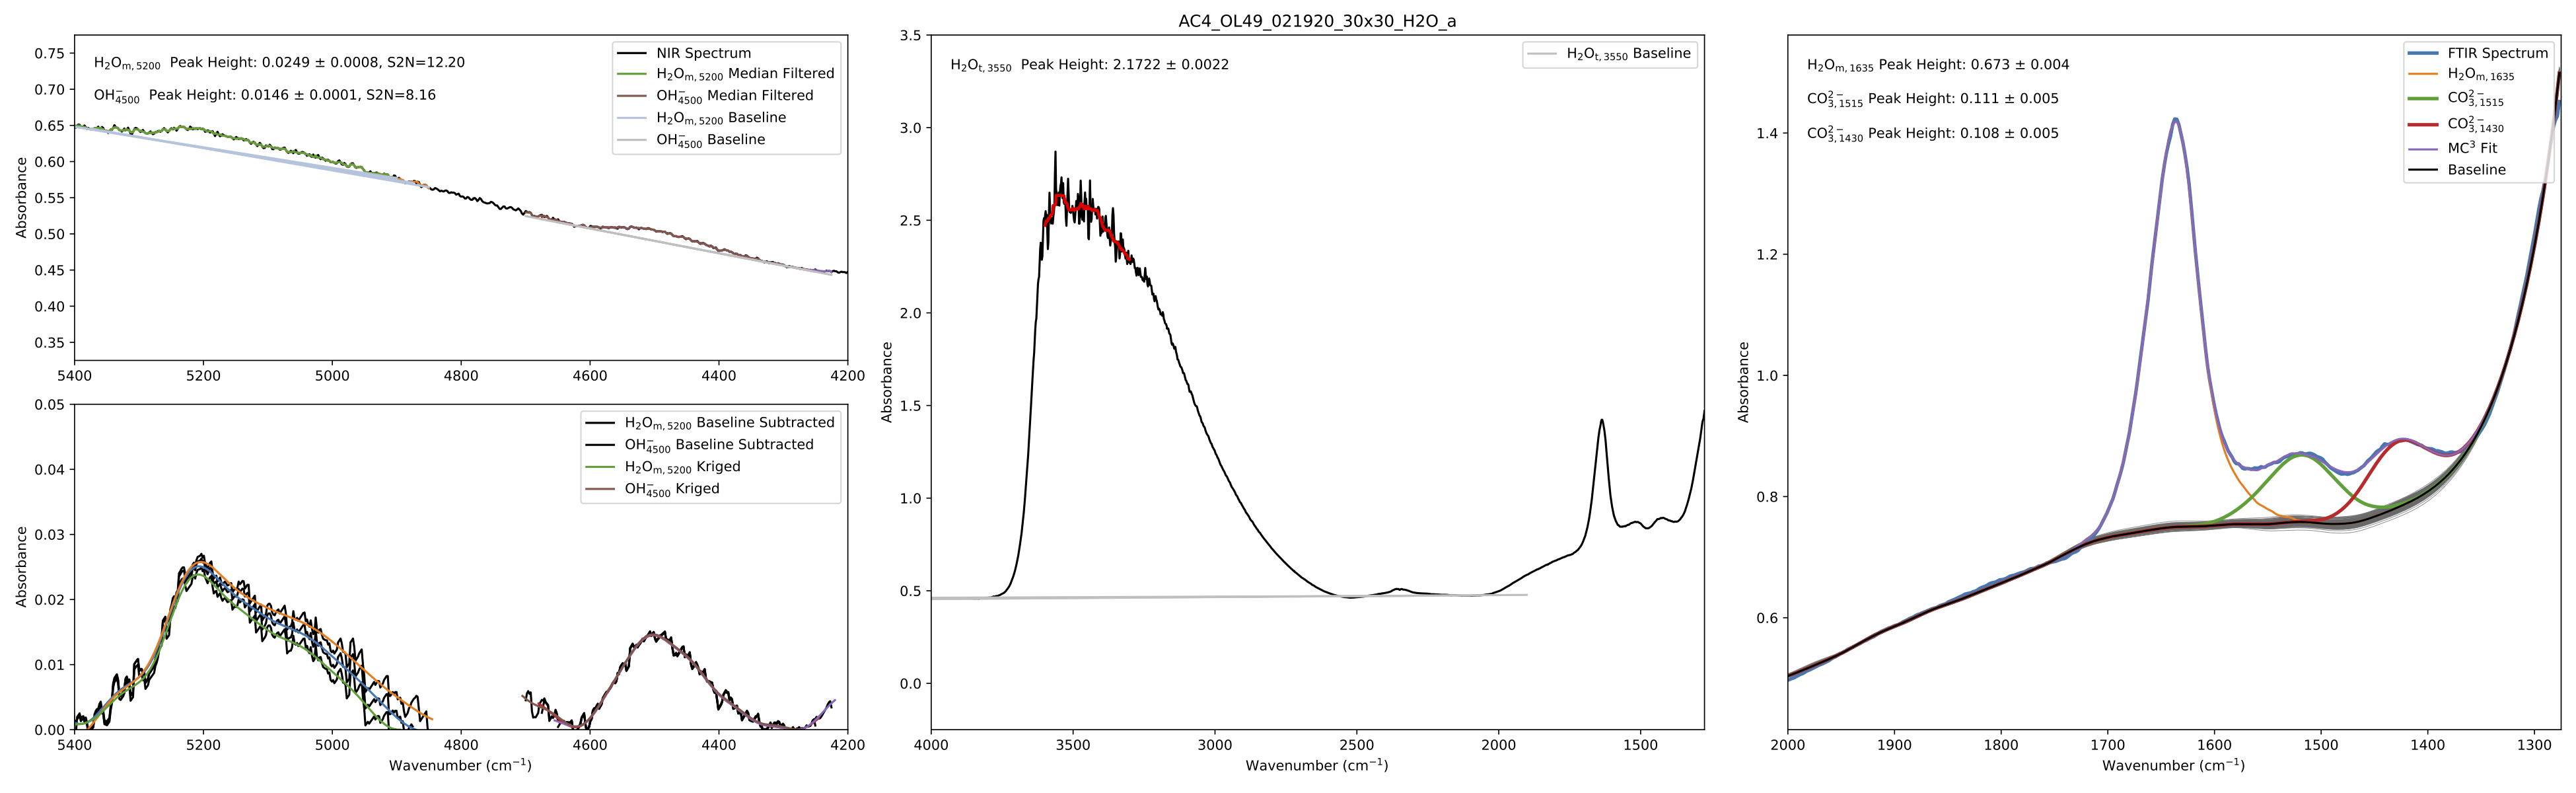

In [21]:
Image("https://github.com/sarahshi/PyIRoGlass/raw/main/docs/examples/transmission_ftir/AC4_OL49_021920_30x30_H2O_a.png")

We can visualize how well PyIRoGlass does in fitting this transmission FTIR spectrum, with the modelfit figure. This plots the fit from $\mathrm{MC^3}$ against the transmission FTIR spectrum, with the residual in fit. 

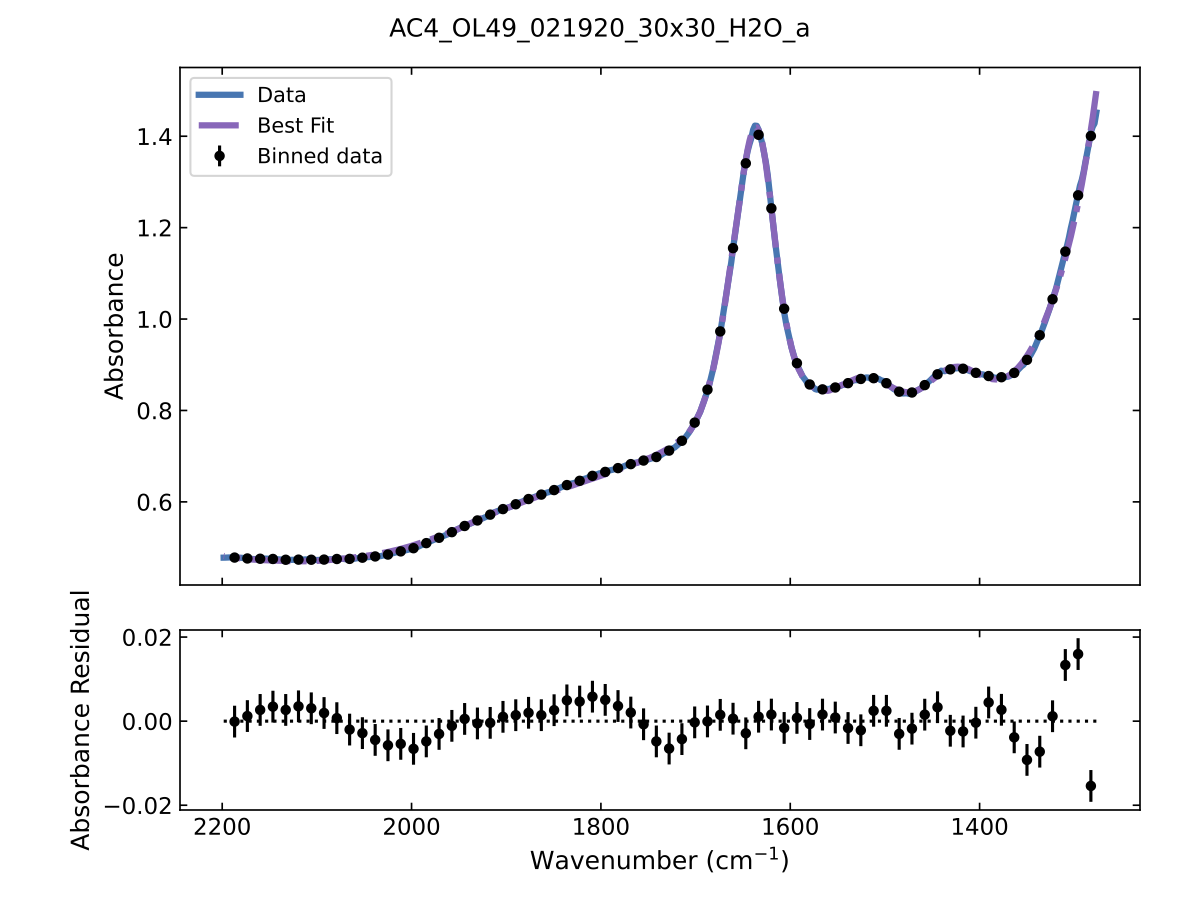

In [22]:
Image("https://github.com/sarahshi/PyIRoGlass/raw/main/docs/examples/transmission_ftir/AC4_OL49_021920_30x30_H2O_a_modelfit.png")

The histogram figure shows the distribution of posterior probability densities, with the mean value displayed in the navy dashed line. The shaded region represents the 68% confidence interval around the value. 

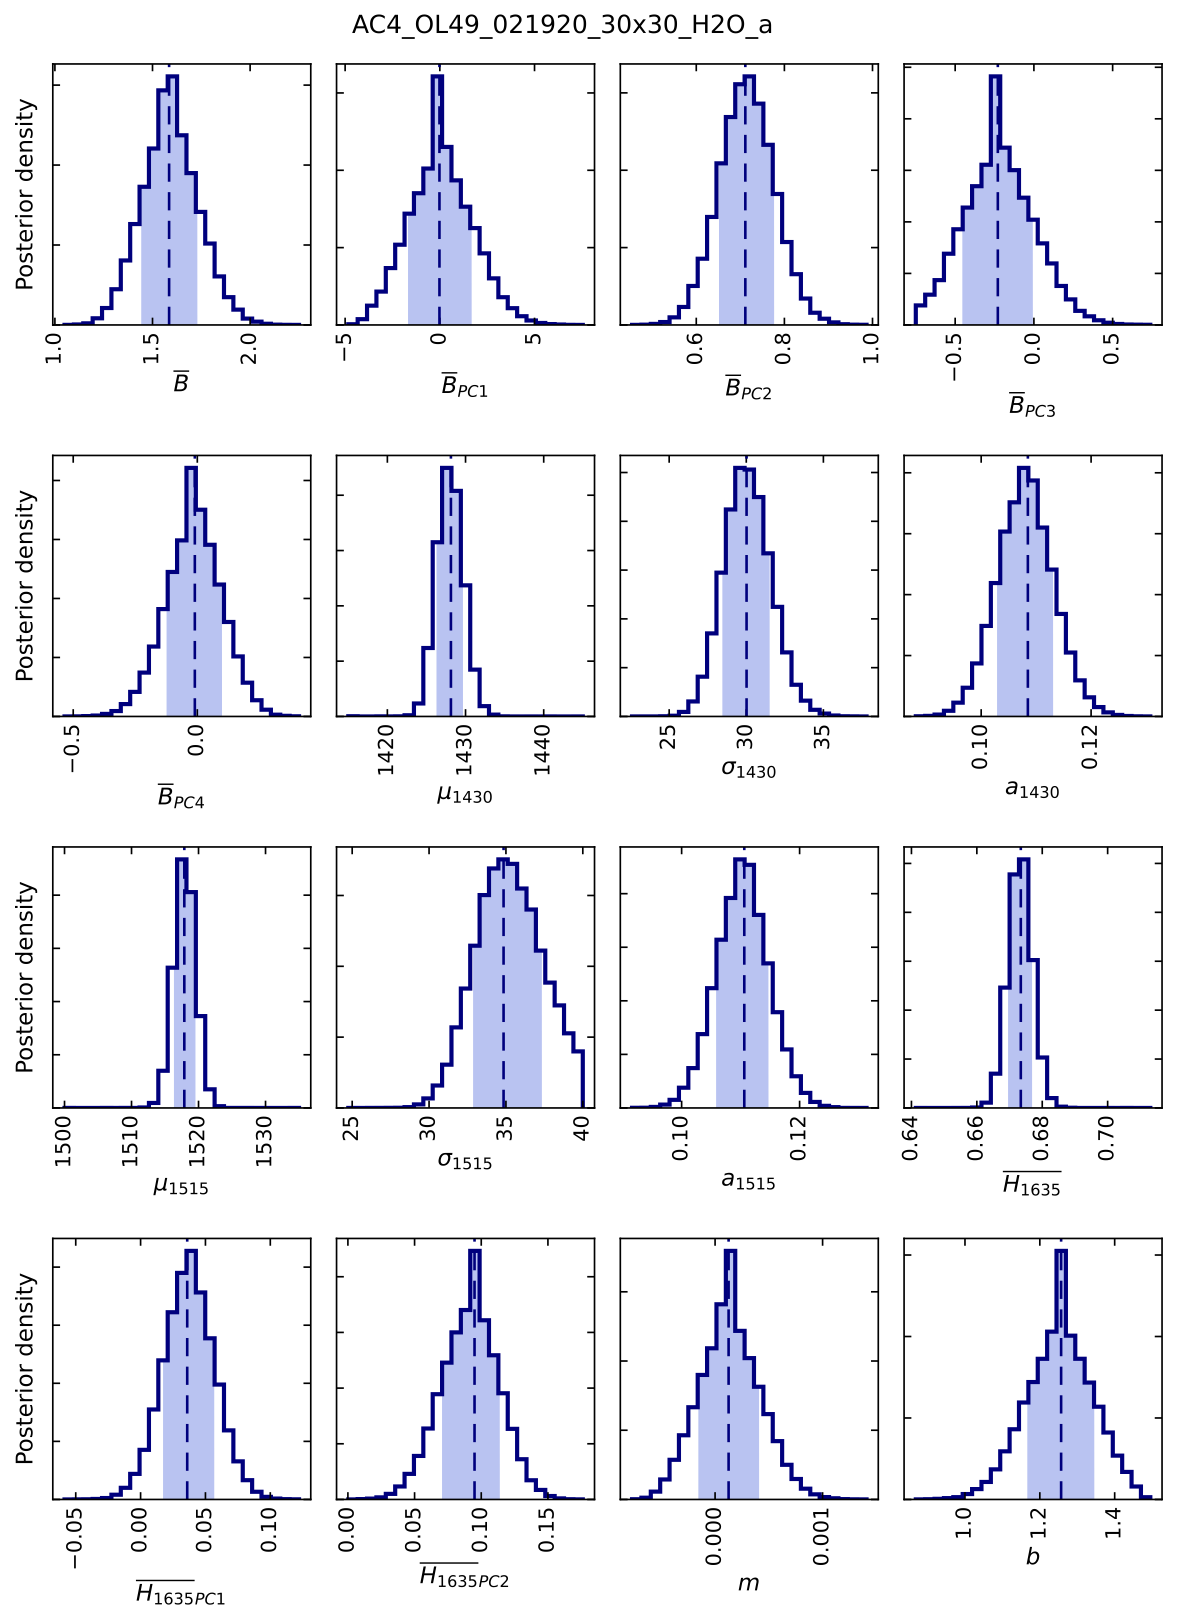

In [23]:
Image("https://github.com/sarahshi/PyIRoGlass/raw/main/docs/examples/transmission_ftir/AC4_OL49_021920_30x30_H2O_a_histogram.png")

The pairwise figure plots the posterior probability density distribution for the 16 fitting parameters of Equation 10, allowing for the visualization of covariance within the parameters. Accounting for covariance allows us to properly account for uncertainty. 

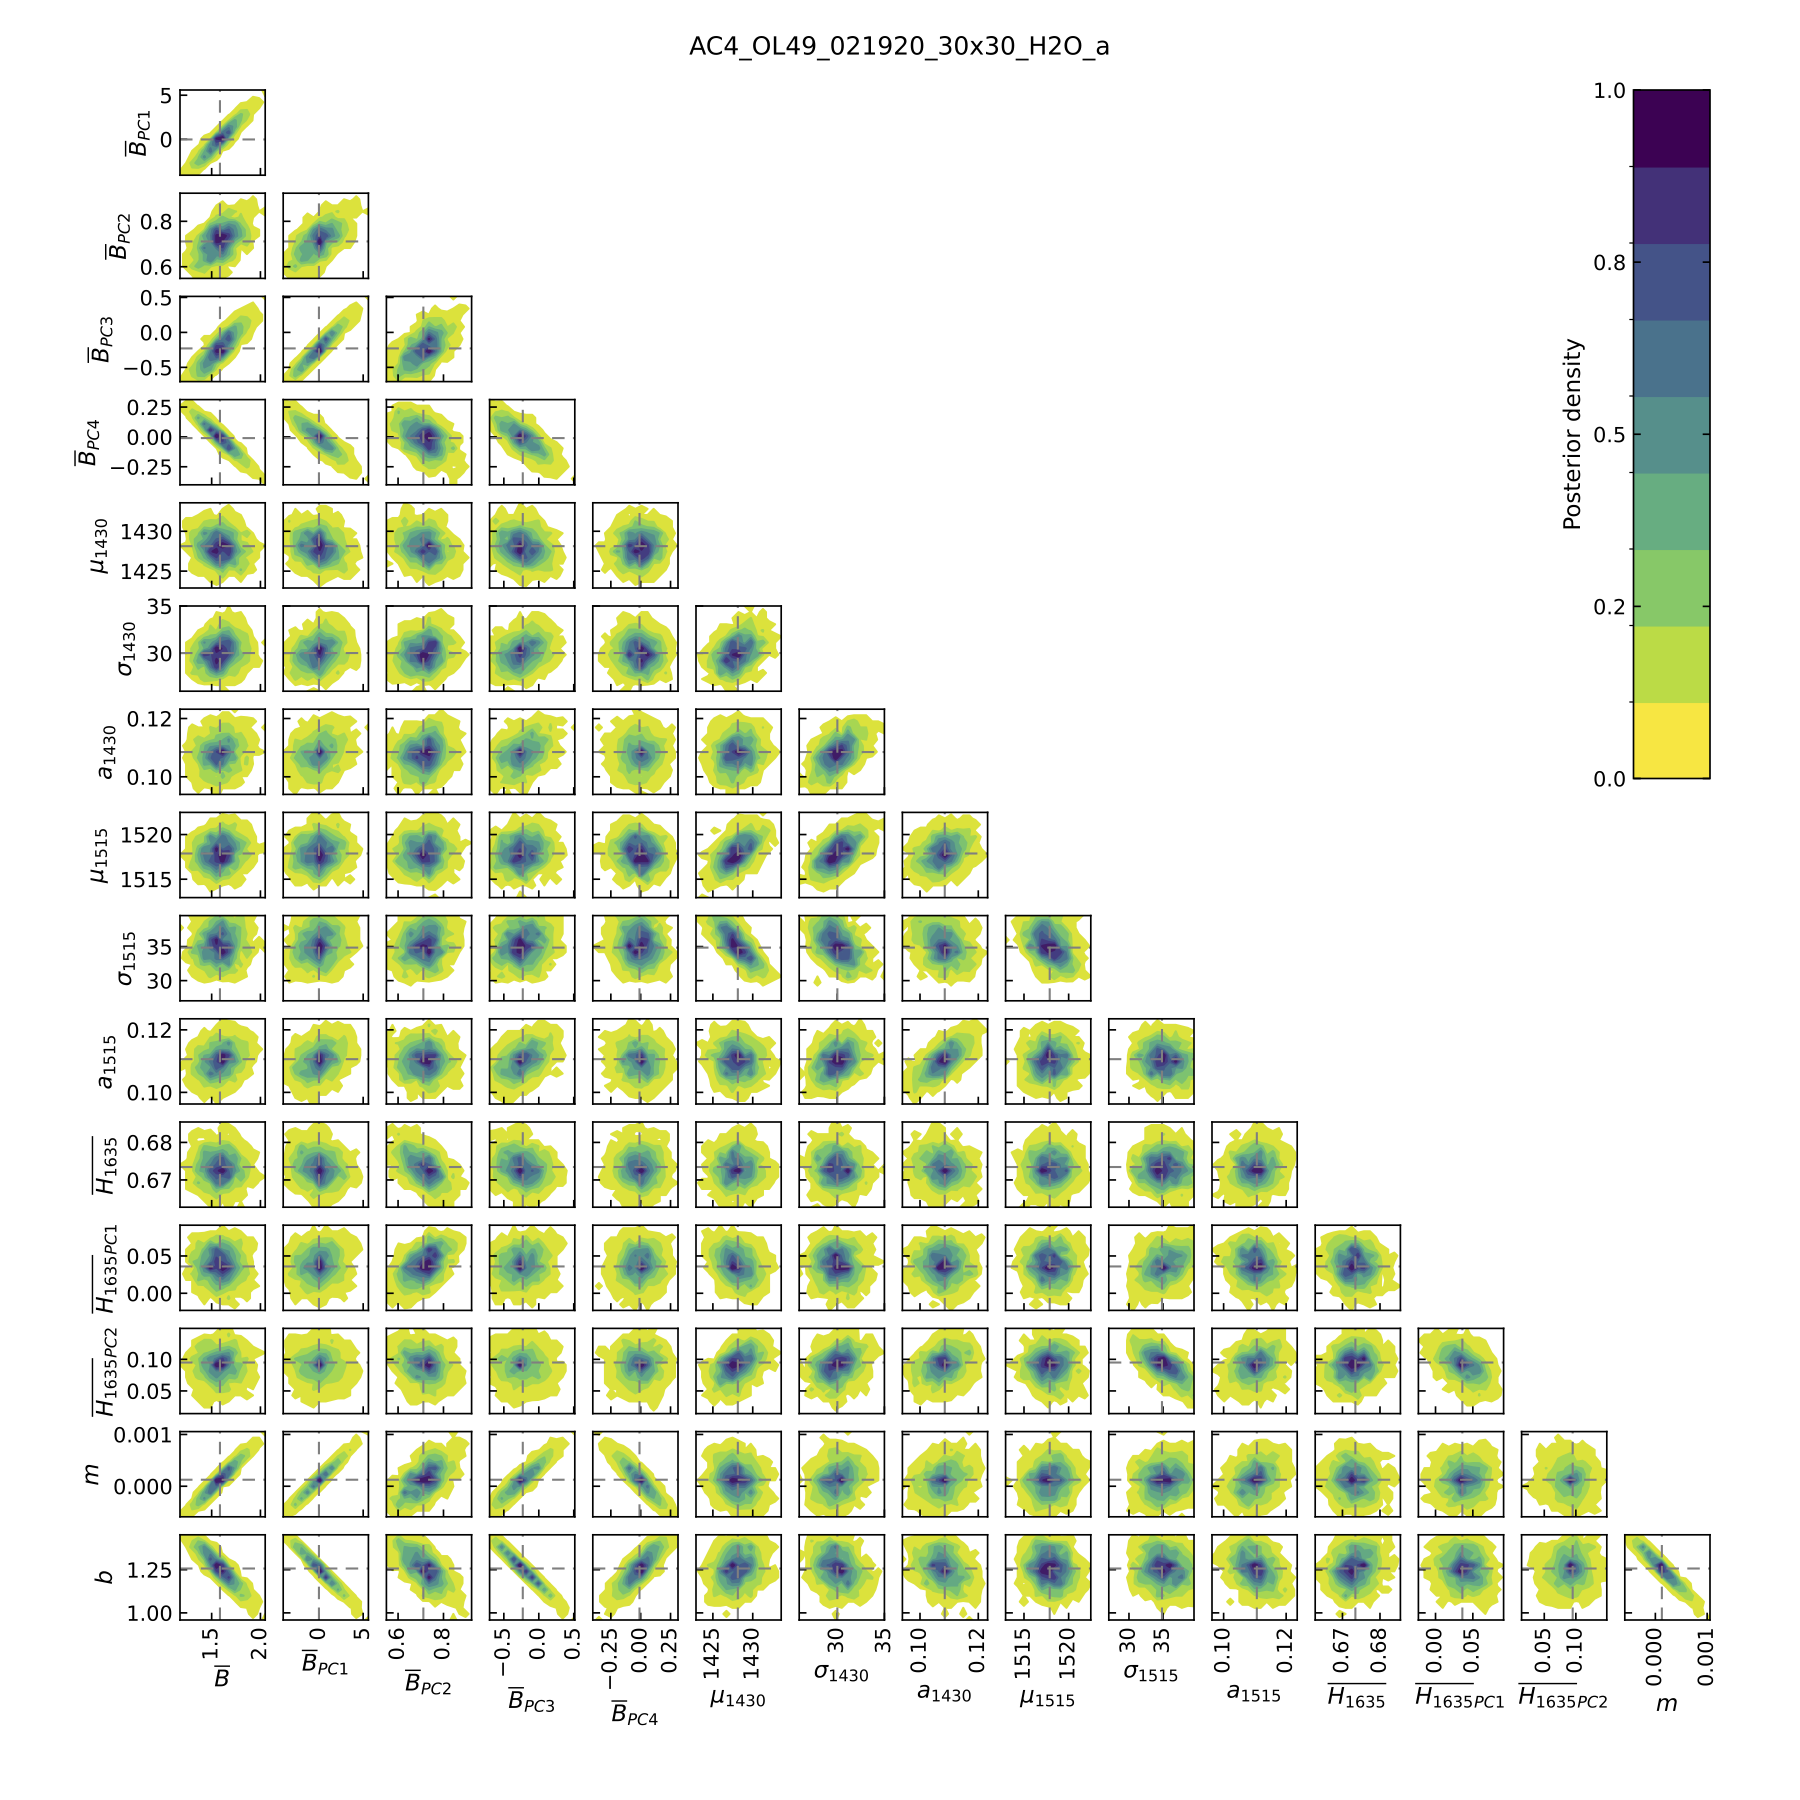

In [24]:
Image("https://github.com/sarahshi/PyIRoGlass/raw/main/docs/examples/transmission_ftir/AC4_OL49_021920_30x30_H2O_a_pairwise.png")

The trace figure shows how the parameters evolve through MCMC sampling. 

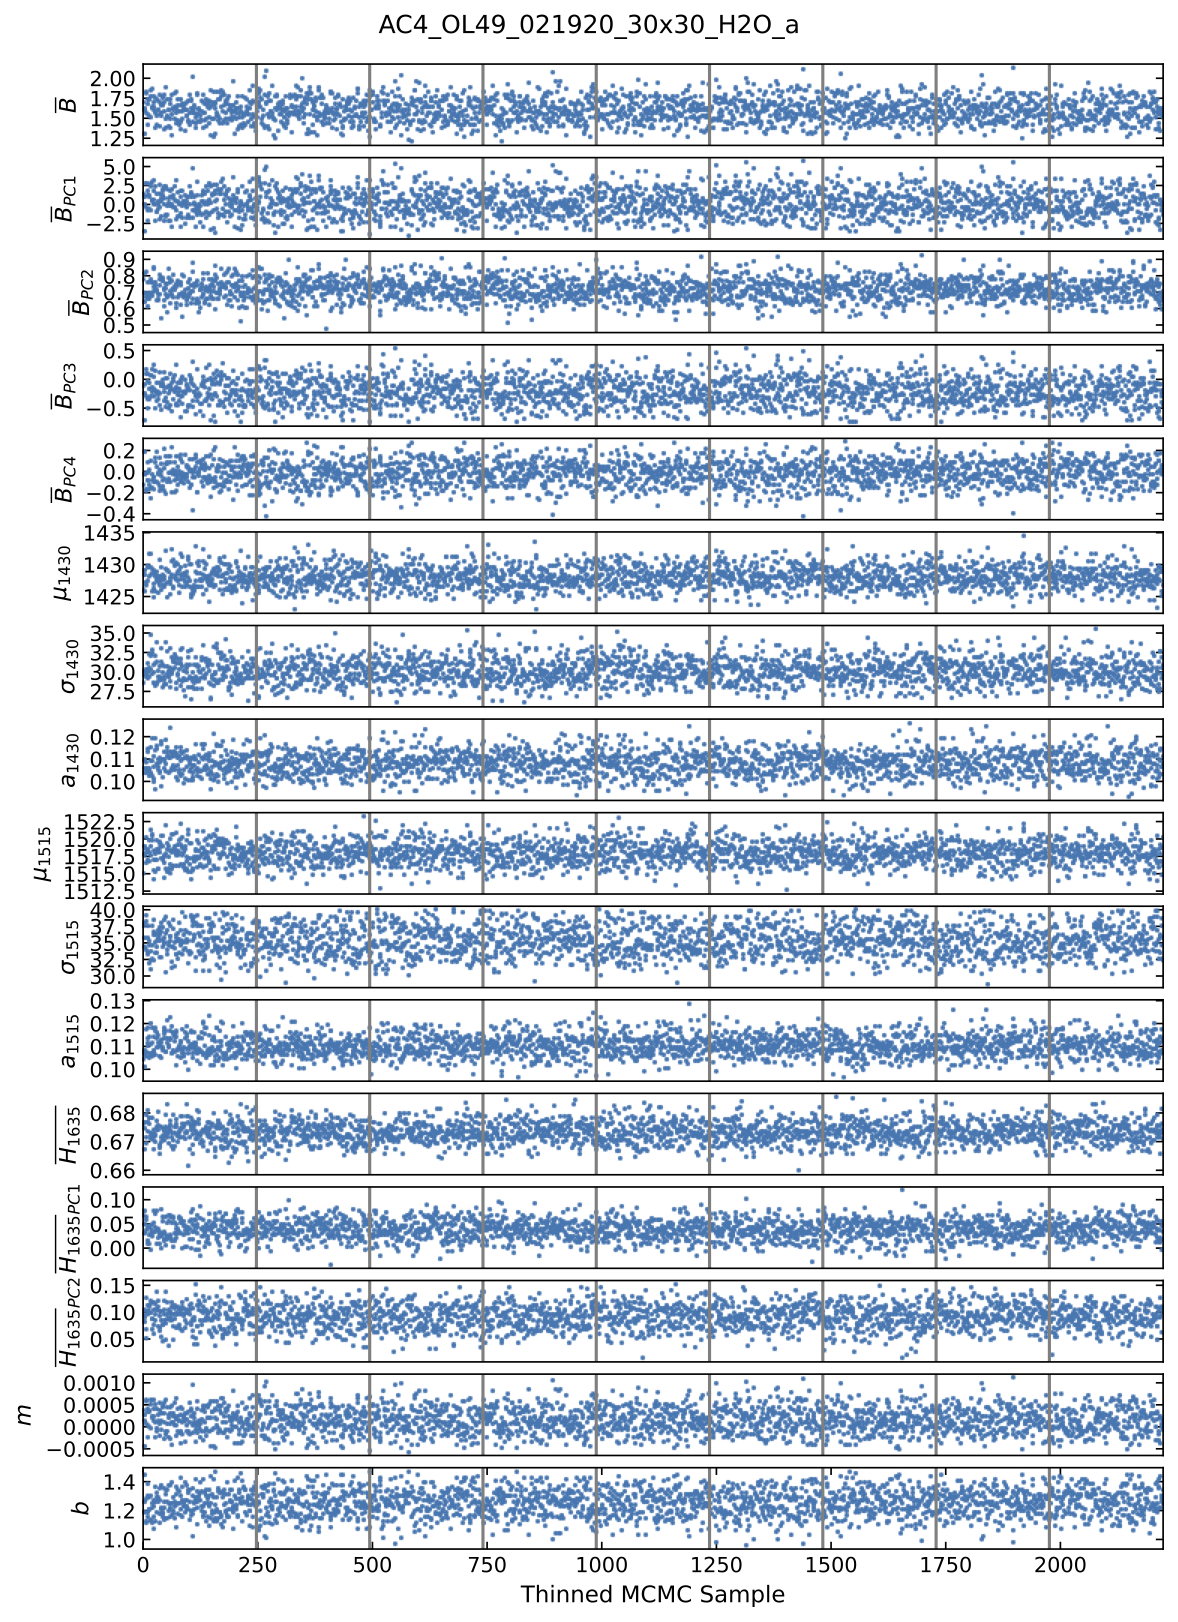

In [25]:
Image("https://github.com/sarahshi/PyIRoGlass/raw/main/docs/examples/transmission_ftir/AC4_OL49_021920_30x30_H2O_a_trace.png")

# LOG and NPZ

.log files record the performance of the MCMC algorithm through the samples, and the best parameters at each 10% increment. These are shown above. 

.npz files store all the best-parameters, sampled parameters, etc. in a ready-to-use NumPy format. 

We won't open these here, but these are quite useful to review! 

# Concentrations

We now want to convert all those peak heights (with uncertainties) to concentrations (with uncertainties), by applying the Beer-Lambert Law. We do so by using the Concentration_Output function, which takes in these parameters and samples over N samples for a secondary MCMC: 

- DF_OUTPUT: Output from Run_All_Spectra
- N: Number of samples for this MCMC
- THICKNESS: Wafer thickness loaded from ChemThick
- MICOMP: Glass composition loaded from ChemThick
- T_ROOM: Room temperature at time of FTIR analysis, given the sensitivity of density to T. 
- P_ROOM: Room pressure at time of FTIR analysis, given the sensitivity of density to P. 


In [26]:
T_ROOM = 25 # C
P_ROOM = 1 # Bar

N = 500000 # MCMC samples
DENSITY_EPSILON, MEGA_SPREADSHEET = pig.Concentration_Output(DF_OUTPUT, N, THICKNESS, MICOMP, T_ROOM, P_ROOM)

DENSITY_EPSILON.to_csv('DensityEpsilon.csv')
MEGA_SPREADSHEET.to_csv('H2OCO2.csv')

We're all done now! Let's print your results. 

In [27]:
MEGA_SPREADSHEET

H2OT_MEAN  H2OT_STD H2OT_3550_M  \
AC4_OL49_021920_30x30_H2O_a       2.573664  0.162079    2.422425   
AC4_OL53_101220_256s_30x30_a      4.038927  0.433994    4.038927   
STD_D1010_012821_256s_100x100_a   0.914890  0.097028    1.202123   

                                H2OT_3550_STD H2OT_3550_SAT H2Om_1635_BP  \
AC4_OL49_021920_30x30_H2O_a          0.190192             *     1.330302   
AC4_OL53_101220_256s_30x30_a         0.433994             -     1.465881   
STD_D1010_012821_256s_100x100_a      0.088183             *     0.164152   

                                H2Om_1635_STD    CO2_MEAN    CO2_STD  \
AC4_OL49_021920_30x30_H2O_a          0.194227  747.899369  40.275367   
AC4_OL53_101220_256s_30x30_a         0.254027   753.92969  74.549642   
STD_D1010_012821_256s_100x100_a      0.027224  214.200028  10.335234   

                                CO2_1515_BP  ... CO2_1430_BP CO2_1430_STD  \
AC4_OL49_021920_30x30_H2O_a       756.30958  ...  741.764409     58.03534   
AC4_OL53_101220_256s_30x30_a     730.404544  ...  777.454835   112.426609   
STD_D1010_012821_256s_100x100_a  231.132432  ...  195.945086    15.420073   

                                H2Om_5200_M H2Om_5200_STD OH_4500_M  \
AC4_OL49_021920_30x30_H2O_a        1.819252      0.350061  1.247276   
AC4_OL53_101220_256s_30x30_a       1.698587       0.39289  2.744228   
STD_D1010_012821_256s_100x100_a    0.303658      0.072746  0.747913   

                                OH_4500_STD PH_5200_S2N PH_4500_S2N ERR_5200  \
AC4_OL49_021920_30x30_H2O_a        0.259934   12.195931     8.15733        -   
AC4_OL53_101220_256s_30x30_a       0.668262    6.904155    5.527653        -   
STD_D1010_012821_256s_100x100_a    0.191462   12.117052   13.264649        -   

                                ERR_4500  
AC4_OL49_021920_30x30_H2O_a            -  
AC4_OL53_101220_256s_30x30_a           -  
STD_D1010_012821_256s_100x100_a        -  

[3 rows x 21 columns]

There are a few things to note. Each column with the suffix _MEAN represents the mean value, _BP represents the best-parameter from MCMC, and _STD represents the standard deviation. We recommend the use of the 'H2OT_MEAN', 'H2OT_STD', 'CO2_MEAN', and 'CO2_STD' columns. The columns with the suffix _S2N show the signal-to-noise ratio of the NIR peaks, and the columns with the prefix ERR_ just process this information, returning a '-' if the peaks are meaningful and a '*' if the signal is too low. 

Concentrations of $\mathrm{H_2O}$ depend on whether your sample is saturated or not. If your sample is unsaturated (marked by H2OT_3550_SAT == '-'), the column 'H2OT_MEAN'=='H2OT_3550_M'. If your sample is saturated (marked by H2OT_3550_SAT == '*'), the column of 'H2OT_MEAN'=='H2Om_1635_BP'+'OH_4500_M'. The $\mathrm{H_2O_{t, 3550}}$ peak cannot be used, given potential nonlinearity in the Beer-Lambert Law. See the discussion of this handling of speciation in the paper. 


Here is also all the other relevant information for calculating these concentrations. All the density and molar absorptivity information is stored in this dataframe. 

The column 'Density' contains the densities used for the final concentration. The values between 'Density' and 'Density_Sat' will be different if the sample is saturated, showing the difference in densities when using variable concentrations of $\mathrm{H_2O_m}$. 

'Tau' and 'Na/Na+Ca' calculate the compositional parameters required for determining molar absorptivity. All calculated molar absorptivities and their uncertainties (sigma_ prefix) from the inversion are provided in the dataframe. 


In [28]:
DENSITY_EPSILON

Density  Density_Sat       Tau  Na/Na+Ca  \
AC4_OL49_021920_30x30_H2O_a      2681.962854  2677.889530  0.705990  0.499048   
AC4_OL53_101220_256s_30x30_a     2702.703546  2702.703546  0.682895  0.389547   
STD_D1010_012821_256s_100x100_a  2795.316967  2803.973265  0.658501  0.331580   

                                 epsilon_H2OT_3550  sigma_epsilon_H2OT_3550  \
AC4_OL49_021920_30x30_H2O_a              66.111161                 7.524313   
AC4_OL53_101220_256s_30x30_a             64.462869                 7.401240   
STD_D1010_012821_256s_100x100_a          62.721880                 7.272084   

                                 epsilon_H2Om_1635  sigma_epsilon_H2Om_1635  \
AC4_OL49_021920_30x30_H2O_a              37.322108                 8.645058   
AC4_OL53_101220_256s_30x30_a             34.452486                 8.504267   
STD_D1010_012821_256s_100x100_a          31.421482                 8.354347   

                                 epsilon_CO2  sigma_epsilon_CO2  \
AC4_OL49_021920_30x30_H2O_a       263.432023          20.347638   
AC4_OL53_101220_256s_30x30_a      302.327096          18.068230   
STD_D1010_012821_256s_100x100_a   322.917560          16.791353   

                                 epsilon_H2Om_5200  sigma_epsilon_H2Om_5200  \
AC4_OL49_021920_30x30_H2O_a               1.009457                 0.300824   
AC4_OL53_101220_256s_30x30_a              0.901474                 0.295851   
STD_D1010_012821_256s_100x100_a           0.787418                 0.290534   

                                 epsilon_OH_4500  sigma_epsilon_OH_4500  
AC4_OL49_021920_30x30_H2O_a             0.861196               0.279541  
AC4_OL53_101220_256s_30x30_a            0.779611               0.274894  
STD_D1010_012821_256s_100x100_a         0.693438               0.269975